In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv("ChurnModeling.csv")

In [39]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
data.shape

(10000, 14)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [43]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1,inplace=True)

In [45]:
data.shape

(10000, 11)

Changing the categorical varibale into numerical varibale with
 Label Encoder

In [46]:
encoder = LabelEncoder()

for i in data.columns:
  if data[i].dtypes == 'object':
    data[i]= encoder.fit_transform(data[i])

data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


Outlier detection and Removal.


In [47]:
def out(df, column):
    global lower,upper
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]

    return  df1.shape[0]+ df2.shape[0]

In [50]:
countOutlier={}
outlier={}

for i in data.columns:
  if out(data,i) == 0:
    continue
  else:
    countOutlier[i] = out(data,i)
    outlier[i] ={'lower':lower,'upper':upper}


countOutlier
   

{'CreditScore': 15, 'Age': 359, 'NumOfProducts': 60, 'Exited': 2037}

In [51]:
outlier

{'CreditScore': {'lower': 383.0, 'upper': 919.0},
 'Age': {'lower': 14.0, 'upper': 62.0},
 'NumOfProducts': {'lower': -0.5, 'upper': 3.5},
 'Exited': {'lower': 0.0, 'upper': 0.0}}

In [52]:
del countOutlier['Exited']
del outlier['Exited']

<AxesSubplot:xlabel='CreditScore'>

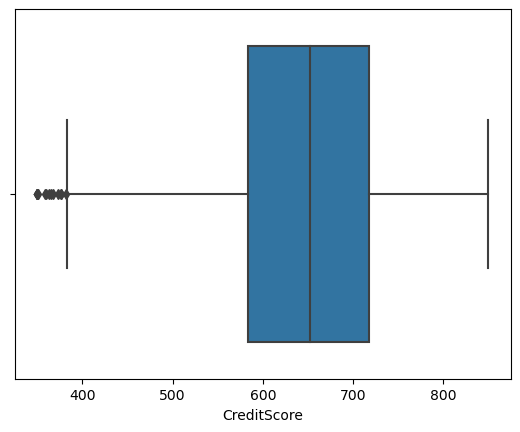

In [53]:
sns.boxplot(data.CreditScore)

In [54]:
creditScoreMean = data.CreditScore.mean()

for i in data.index:
  if (data.loc[i,'CreditScore']<outlier['CreditScore']['lower']) | (data.loc[i,'CreditScore']>outlier['CreditScore']['upper']):
    data.loc[i,'CreditScore'] = creditScoreMean

<AxesSubplot:xlabel='CreditScore'>

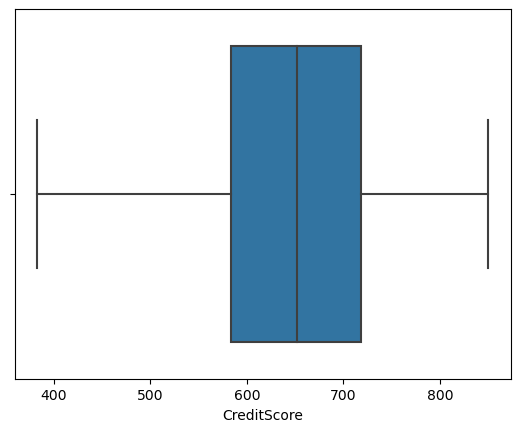

In [55]:
sns.boxplot(data.CreditScore)

<AxesSubplot:xlabel='Age'>

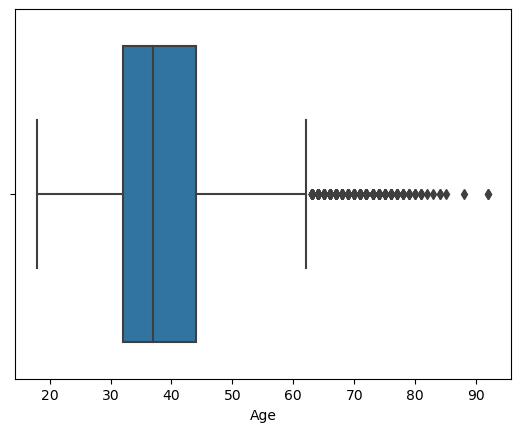

In [56]:
sns.boxplot(data.Age)

<AxesSubplot:xlabel='Age'>

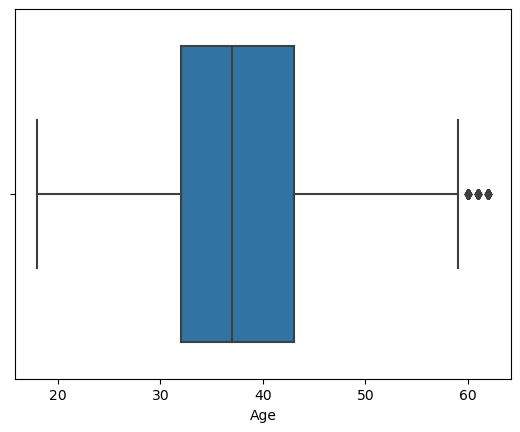

In [57]:
ageMean = data.Age.mean()

for i in data.index:
  if (data.loc[i,'Age']<outlier['Age']['lower']) | (data.loc[i,'Age']>outlier['Age']['upper']):
    data.loc[i,'Age'] = ageMean

sns.boxplot(data.Age)

Cheking for multicollinearity in the data.

Plotting the Heat Map to check the correlation of the data.

<AxesSubplot:>

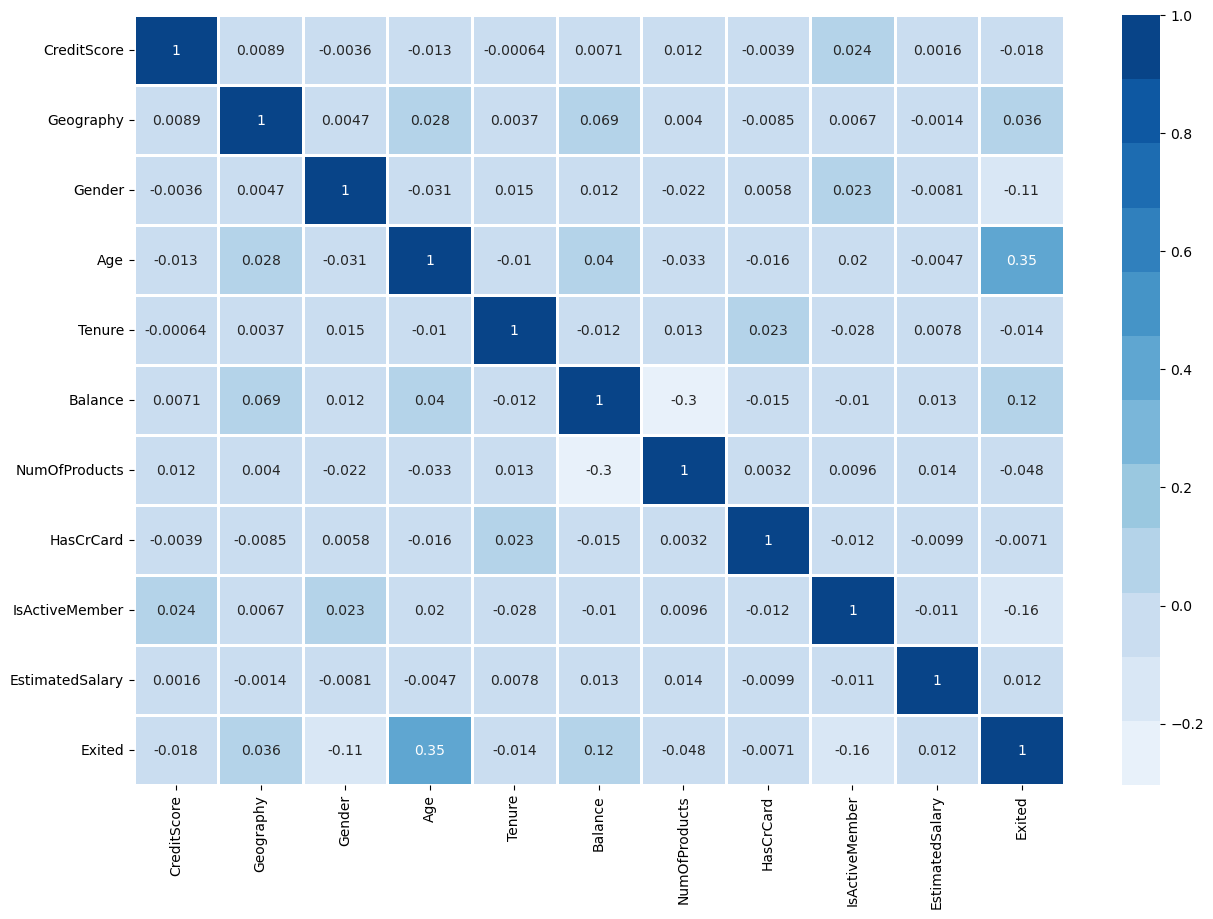

In [58]:
colorMap = sns.color_palette("Blues",12)
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), linewidth = 1 , annot = True, cmap = colorMap)

Checking the data for imbalance.

In [59]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

We can see that the data is imbalanced.

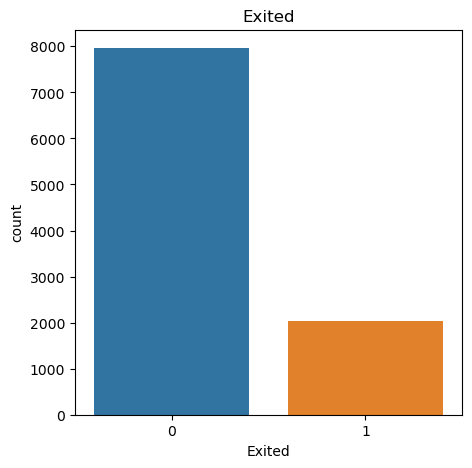

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(data.Exited)
plt.title('Exited')
plt.show()

Oversampling the data with resample method

In [61]:
dataMajority = data[data.Exited==0]
dataMinority = data[data.Exited==1]

In [62]:
from sklearn.utils import resample

dataMinorityUpsampled = resample(dataMinority,  replace=True, n_samples=len(dataMajority), random_state=42)

dataUpsampled = pd.concat([dataMajority, dataMinorityUpsampled])

dataUpsampled.Exited.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

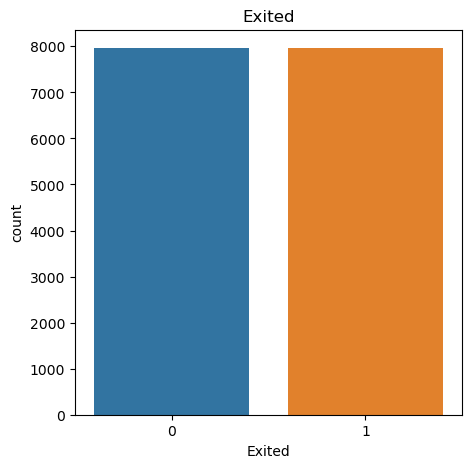

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(dataUpsampled.Exited)
plt.title('Exited')
plt.show()

In [64]:
dataUpsampled.sort_index()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709.0,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,1,1,42.0,3,75075.31,2,1,0,92888.52,1
9998,772.0,1,1,42.0,3,75075.31,2,1,0,92888.52,1
9998,772.0,1,1,42.0,3,75075.31,2,1,0,92888.52,1


In [65]:
dataUpsampled.shape

(15926, 11)

Now, the data is balanced

In [66]:
x = dataUpsampled.drop('Exited', axis=1)
y = dataUpsampled.Exited

In [67]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of X Train: ",xTrain.shape)
print("Shape of Y Train: ",yTrain.shape)
print("Shape of X Test: ",xTest.shape)
print("Shape of Y Test: ",yTest.shape)

Shape of X Train:  (12740, 10)
Shape of Y Train:  (12740,)
Shape of X Test:  (3186, 10)
Shape of Y Test:  (3186,)


Using standard Scalar to scale the data.

In [68]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

xTrain = scale.fit_transform(xTrain)
xTest = scale.transform(xTest)

Logistic Regression:

In [69]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

In [70]:
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(xTrain, yTrain)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred = logreg_cv.predict(xTest)
logScore = accuracy_score(yTest, y_pred)
print("\nAccuracy:",round(logScore*100,2),"%")

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.713657770800628

Accuracy: 71.5 %


Decision Tree :

Random Forest :

In [73]:
parameters={'n_estimators': [100,200,300,500]}

In [74]:
clf = RandomForestClassifier(criterion='gini', max_depth= 18, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state=200)
clf_cv=GridSearchCV(clf,parameters, cv=10)
clf_cv.fit(xTrain,yTrain)

print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

y_pred = clf_cv.predict(xTest)

randomScore = accuracy_score(yTest, y_pred)
print("\nAccuracy:", round(randomScore*100,2),"%")

tuned hpyerparameters :(best parameters)  {'n_estimators': 300}
accuracy : 0.9461538461538461

Accuracy: 94.82 %


Artificial neural network (ANN):


In [1]:
dataUpsampled.shape

NameError: name 'dataUpsampled' is not defined

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout

In [ ]:
model = keras.Sequential()

model.add(Dense(30, input_dim=10, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,  activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 25)                775       
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                520       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dropout_6 (Dropout)         (None, 15)               

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callEarly=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=50,verbose=1,mode="auto")

In [ ]:
history = model.fit(xTrain,yTrain,epochs=250,validation_split = 0.2)

Epoch 1/250
319/319 [==============================] - 2s 4ms/step - loss: 0.6289 - accuracy: 0.6545 - val_loss: 0.5518 - val_accuracy: 0.7198
Epoch 2/250
319/319 [==============================] - 1s 4ms/step - loss: 0.5534 - accuracy: 0.7354 - val_loss: 0.5194 - val_accuracy: 0.7484
Epoch 3/250
319/319 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.7585 - val_loss: 0.4862 - val_accuracy: 0.7543
Epoch 4/250
319/319 [==============================] - 1s 4ms/step - loss: 0.4968 - accuracy: 0.7651 - val_loss: 0.4724 - val_accuracy: 0.7692
Epoch 5/250
319/319 [==============================] - 1s 5ms/step - loss: 0.4880 - accuracy: 0.7688 - val_loss: 0.4700 - val_accuracy: 0.7688
Epoch 6/250
319/319 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.7716 - val_loss: 0.4603 - val_accuracy: 0.7771
Epoch 7/250
319/319 [==============================] - 1s 4ms/step - loss: 0.4741 - accuracy: 0.7816 - val_loss: 0.4619 - val_accuracy: 0.7747

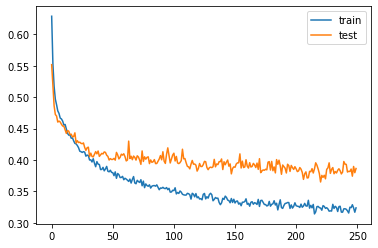

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 82.73%


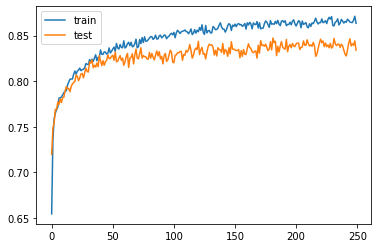

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
val_accuracy = np.mean(history.history['accuracy'])
print("\n%s: %.2f%%" % ('accuracy', val_accuracy*100))


accuracy: 84.66%


In [ ]:
ScoreList = [['Logistic Regression', round(logScore*100,2)],
         ['Decision Tree', round(decisionScore*100,2)],
         ['Random Forest', round(randomScore*100,2)],
         ['ANN', round(val_accuracy*100,2)]]

ScoreList

[['Logistic Regression', 71.5],
 ['Decision Tree', 90.05],
 ['Random Forest', 94.82],
 ['ANN', 84.66]]

In [ ]:
Scores = pd.DataFrame(ScoreList, columns=['Algorithms', 'Score'])

In [ ]:
display(Scores)

,Algorithms,Score
0,Logistic Regression,71.50
1,Decision Tree,90.05
2,Random Forest,94.82
3,ANN,84.66


We can see that in Random Forest, we are getting maximum accuracy with optimised parameters.
